<a href="https://colab.research.google.com/github/CodeWidAvinash/Age-And-Gender-Detection/blob/main/age_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

base_dir = '/content/drive/MyDrive/Age/drive/train'

child_dir = os.path.join(base_dir, 'child')
middle_age_dir = os.path.join(base_dir, 'middle age')
old_dir = os.path.join(base_dir, 'old')

print('total training child images:', len(os.listdir(child_dir)))
print('total training  images:', len(os.listdir(middle_age_dir)))
print('total training old images:', len(os.listdir(old_dir)))

child_files = os.listdir(child_dir)
print(child_files[:10])
middle_age_files=os.listdir(middle_age_dir)
old_age_files=os.listdir(old_dir)

total training child images: 2557
total training  images: 9416
total training old images: 3695
['3_0_3_20161219230155056.jpg', '3_0_0_20170109191400809.jpg', '3_0_1_20170113145440942.jpg', '3_0_0_20170110205355795.jpg', '3_0_1_20170110213803097.jpg', '3_0_4_20170103205122074.jpg', '3_0_3_20161220145012367.jpg', '3_0_0_20161219161157166.jpg', '3_0_0_20170110213243664.jpg', '3_0_0_20170110212707387.jpg']


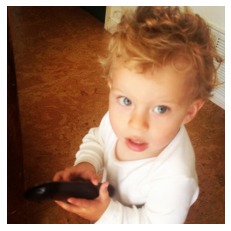

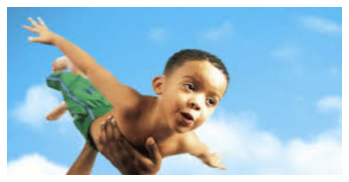

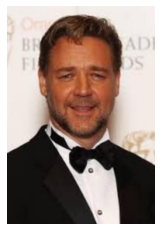

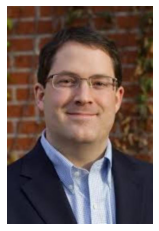

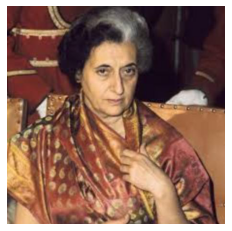

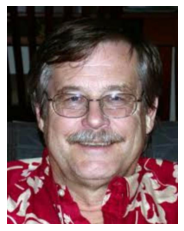

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_child = [os.path.join(child_dir, fname) 
                for fname in child_files[pic_index-2:pic_index]]
next_middle_age= [os.path.join(middle_age_dir, fname) 
                for fname in middle_age_files[pic_index-2:pic_index]]
next_old = [os.path.join(old_dir, fname) 
                for fname in old_age_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_child+next_middle_age+next_old):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
url="https://tfhub.dev/google/efficientnet/b7/feature-vector/1"

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

model = tf.keras.models.Sequential([
    
    
    hub.KerasLayer(url,
                   trainable=False,
                   name="feature_extractor_layer",
                   input_shape =(150, 150,3)),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_layer (Ke  (None, 2560)             64097680  
 rasLayer)                                                       
                                                                 
 dense (Dense)               (None, 64)                163904    
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 64,261,779
Trainable params: 164,099
Non-trainable params: 64,097,680
_________________________________________________________________


In [ ]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/MyDrive/Age/drive/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/Age/drive/val"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 15668 images belonging to 3 classes.
Found 1203 images belonging to 3 classes.


In [ ]:
# Train the model
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/25
20/20 [==============================] - 941s 45s/step - loss: 0.6528 - accuracy: 0.7036 - val_loss: 0.5546 - val_accuracy: 0.7513
Epoch 2/25
20/20 [==============================] - 687s 34s/step - loss: 0.5486 - accuracy: 0.7698 - val_loss: 0.5253 - val_accuracy: 0.7857
Epoch 3/25
20/20 [==============================] - 602s 30s/step - loss: 0.5459 - accuracy: 0.7595 - val_loss: 0.5463 - val_accuracy: 0.7460
Epoch 4/25
20/20 [==============================] - 473s 24s/step - loss: 0.5135 - accuracy: 0.7948 - val_loss: 0.4617 - val_accuracy: 0.8175
Epoch 5/25
20/20 [==============================] - 391s 20s/step - loss: 0.5132 - accuracy: 0.7849 - val_loss: 0.5450 - val_accuracy: 0.7619
Epoch 6/25
20/20 [==============================] - 338s 17s/step - loss: 0.5123 - accuracy: 0.7964 - val_loss: 0.4979 - val_accuracy: 0.7910
Epoch 7/25
20/20 [==============================] - 255s 13s/step - loss: 0.4935 - accuracy: 0.8015 - val_loss: 0.4805 - val_accuracy: 0.8042
Epoch 

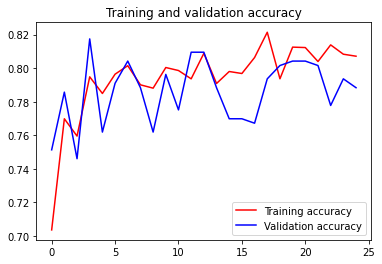

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
model.save("model1.h5")